In [1]:
import numpy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_samples = 1000, n_features = 20, n_classes = 2, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)  

In [8]:
def create_dropout_model(dropout_rate = 0.2):
    model = Sequential([
            Dense(64, input_shape = (X_train.shape[1], ), activation = 'relu'),
            Dropout(dropout_rate),
            Dense(32, activation = 'relu'),
            Dropout(dropout_rate),
            Dense(1, activation = 'sigmoid')
    ])
    return model

In [9]:
dropout_model = create_dropout_model(dropout_rate = 0.2)
dropout_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
dropout_history = dropout_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), verbose = 0)


In [14]:
def create_gradient_clip_model(clip_norm = 1.0):
    model = Sequential([
            Dense(64, input_shape = (X_train.shape[1], ), activation = 'relu'),
            Dense(32, activation = 'relu'),
            Dense(1, activation = 'sigmoid')
    ])
    
    optimizer = Adam(clipnorm = clip_norm)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [15]:
gradient_clip_model = create_gradient_clip_model(clip_norm = 1.0)
gradient_clip_history = gradient_clip_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6533 - loss: 0.6364 - val_accuracy: 0.7800 - val_loss: 0.5063
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4638 - val_accuracy: 0.8300 - val_loss: 0.4206
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8587 - loss: 0.3780 - val_accuracy: 0.8400 - val_loss: 0.3688
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.3104 - val_accuracy: 0.8600 - val_loss: 0.3510
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.2938 - val_accuracy: 0.8600 - val_loss: 0.3436
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.2853 - val_accuracy: 0.8600 - val_loss: 0.3401
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8928 - loss: 0.2880 - val_accuracy: 0.8650 - val_loss: 0.3366
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.2895 - val_accuracy: 0.8600 - val_loss:

In [17]:
import matplotlib.pyplot as plt

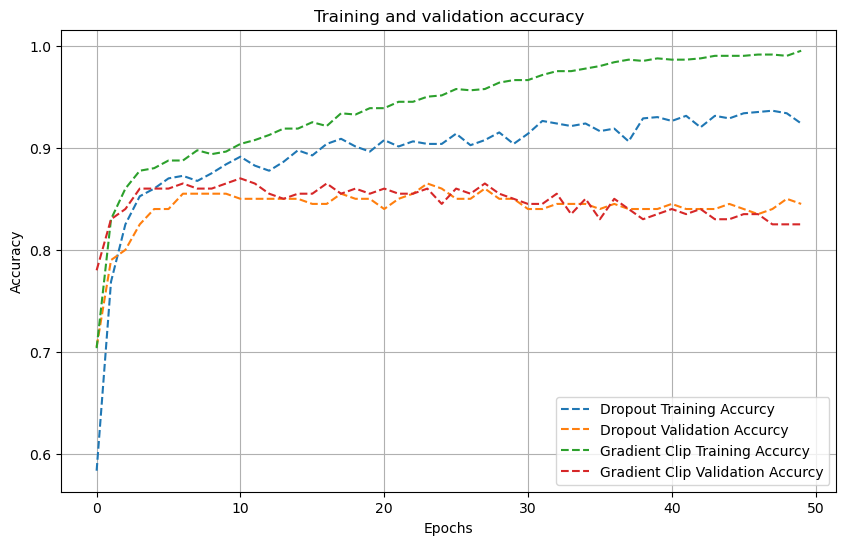

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(dropout_history.history['accuracy'], label = 'Dropout Training Accurcy', linestyle = '--')
plt.plot(dropout_history.history['val_accuracy'], label = 'Dropout Validation Accurcy', linestyle = '--')
plt.plot(gradient_clip_history.history['accuracy'], label = 'Gradient Clip Training Accurcy', linestyle = '--')
plt.plot(gradient_clip_history.history['val_accuracy'], label = 'Gradient Clip Validation Accurcy', linestyle = '--')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()